# Implementacion de un filtro trapezoidal


Aqui ira la teoria y las ecuaciones de diseño del filtro
.
.
.

refferencias:

- Improvement in Trapezoidal Pulse Shaping Pile-Up in Nuclear Signal Processing
- VHDL Simulation of Trapezoidal Filter for Digital Nuclear Spectroscopy systems


### Conformacion de las señales exponenciales de eventos

Tipicamente los eventos de interaccion nuclear generan una señal del tipo exponencial la cual desea ser representada por el filtro trapezoidal, 

A continuacion se construira la señal a ser evaluada

In [2]:
# Importacion de librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

- Ecuacion en el continuo
$$X_{amp} = \frac{Q}{Cf}e^{-\frac{t}{\tau}}u(t)$$

- Ecuacion discreta
$$X_{amp} = \frac{Q}{Cf}\frac{1}{1-d z^{-1}}$$

In [3]:
Q = 1  # Carga del detector
Cf = 1 # Capacitancia del detector
tao = 1/5 # constante de tiempo en segundos
Ts = 0.001 # Periodo de muestreo

d = np.exp(-Ts/tao)

t = np.arange(0,10,Ts)
delay = 5

In [37]:
print(d)

0.9950124791926823


In [4]:
def x_amp(A, delay):
    return A*(Q/Cf)*np.exp(-((t-delay)/tao))*np.heaviside(t-delay, 1)

In [5]:
x = x_amp(1,delay)

<function matplotlib.pyplot.show(close=None, block=None)>

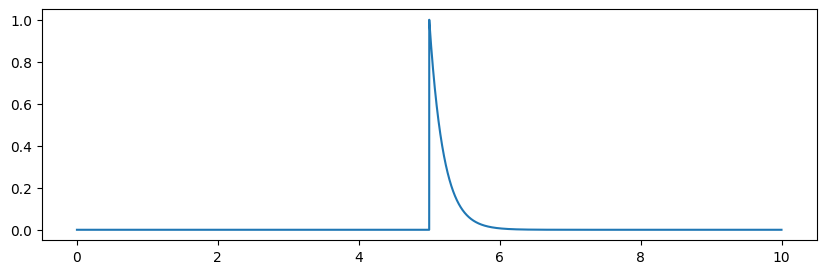

In [6]:
plt.figure(figsize=(10,3))
plt.plot(t,x)
plt.show

## Implementacion del filtro trapezoidal

In [7]:
ta = 0.05
tb = 0.15
tc = 0.2 # ta + tb
na = int(ta/Ts)
nb = int(tb/Ts)
nc = int(tc/Ts)

In [8]:
print("na = ", na)
print("nb = ", nb)
print("nc = ", nc)

na =  50
nb =  150
nc =  200


In [59]:
def traps(x):
    y = np.zeros(len(x))
    for n in range(nc+2,len(x)):
        a1 = x[n-1] - x[n-na-1] - x[n-nb-1] + x[n-nc-1]
        b1 = - d*(x[n-2] - x[n-na-2] - x[n-nb-2] + x[n-nc-2])
        c1 = na*(2*y[n-1] - y[n-2])

        y[n] = (a1 + b1 + c1) / na

    return y

def trpas_cont (x):
    y = np.zeros(len(x))
    acc = np.zeros([len(x),13])

    d_ = np.floor(np.exp(-Ts/tao) * (2**12))
    a_ = (2**12)

    for n in range(nc+2,len(x)):

        # Particion de la operacion
        acc[n,0]  = np.floor(x[n])
        acc[n,1]  = np.floor(x[n-1] * a_)
        acc[n,2]  = np.floor(- d_ * x[n-2])
        acc[n,3]  = np.floor(- x[n-na-1] * a_)
        acc[n,4]  = np.floor(d_ * x[n-na-2])
        acc[n,5]  = np.floor(- x[n-nb-1] * a_)
        acc[n,6]  = np.floor(d_ * x[n-nb-2])
        acc[n,7]  = np.floor(x[n-nc-1] * a_)
        acc[n,8]  = np.floor(- d_ * x[n-nc-2])
        acc[n,9]  = np.floor(2 * na * y[n-1] * a_)
        acc[n,10] = np.floor(- na * y[n-2] * a_)
        acc[n,11] = np.floor(acc[n,1] + acc[n,2] + acc[n,3] + acc[n,4] + acc[n,5] + acc[n,6] + acc[n,7] + acc[n,8] + acc[n,9] + acc[n,10])
        acc[n,12] = np.round(acc[n,11] / (na * a_))

        y[n] = acc[n,12]

    return y, acc

In [56]:
print(np.floor(np.exp(-Ts/tao) * (2**12)))


4075.0


In [91]:
y = traps(x)

<function matplotlib.pyplot.show(close=None, block=None)>

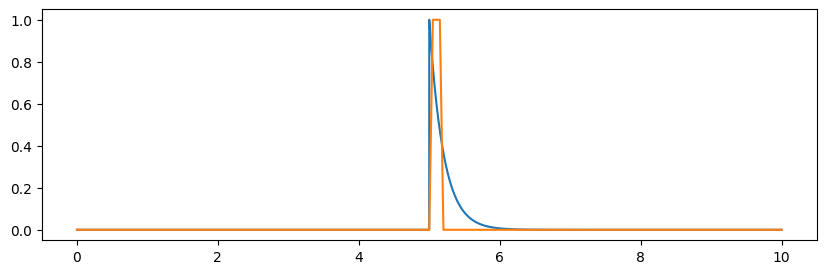

In [92]:
plt.figure(figsize=(10,3))
plt.plot(t,x)
plt.plot(t,y)
plt.show

Ejemplo cn multiples pulsos

In [10]:
x = x_amp(0.5,1) + x_amp(0.5,2) + x_amp(0.55,3) + x_amp(0.4,3.2) + x_amp(0.6,5) + x_amp(0.8,5.5)+ x_amp(0.4,6)+ x_amp(0.6,7)+ x_amp(0.5,8)+ x_amp(0.5,9)
    

<function matplotlib.pyplot.show(close=None, block=None)>

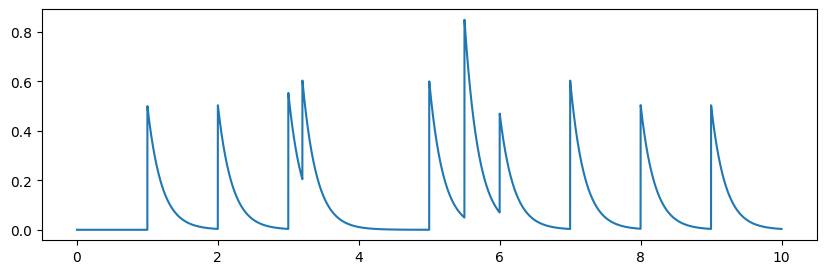

In [105]:
plt.figure(figsize=(10,3))
plt.plot(t,x)
plt.show

In [20]:
data = np.round(x * 2**12).astype(int)
df = pd.DataFrame(data)
df.to_csv('data.csv', index=False)

In [60]:
entrada = np.round(x * 2**12).astype(int)
y_, salida = trpas_cont(entrada)
df = pd.DataFrame(salida)
df.to_csv('dataSalida.csv', index=False, header=["x", "acc0", "acc1", "acc2", "acc3", "acc4", "acc5", "acc6", "acc7", "acc8", "acc9", "cociente", "y"])

<function matplotlib.pyplot.show(close=None, block=None)>

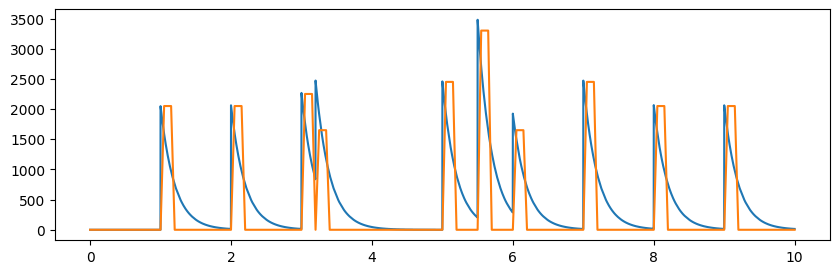

In [61]:
y = traps(data)
plt.figure(figsize=(10,3))
plt.plot(t,data)
plt.plot(t,y_)
plt.show

![image](images/im3.jpeg)
![image](images/im2.jpeg)
![image](images/im1.jpeg)